In [1]:
from Model.DCVAE import MobileNetVae
from Model.Utils import PlotHistory, PlotDataAE, Save_Model
from Model.Utils import load_from_tfrecords, convert_to_tfrecords, load_numpy
from keras.optimizers import RMSprop,Adam
import numpy as np
import tensorflow as tf
import os
%matplotlib notebook

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Load DataSet

In [2]:
load_tfrecords = True 
create_tfrecords = False

path_tfr = 'DataSet/MPS45'
path_npy = '/share/GeoFacies/DataSet/MPS45/MPS45.npy'
batch_size = 32

In [3]:
if load_tfrecords:
    if create_tfrecords: 
        x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)
        convert_to_tfrecords(path_tfr, x_train, x_test)
        gen_train, gen_test = load_from_tfrecords(path_tfr, batch_size)
    else:
        try:
            gen_train, gen_test = load_from_tfrecords(path_tfr, batch_size)
        except:
            print("Data not found. Change 'create_tfrecords' to True")
else:
    x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)

# Create Convolutional Variational Autoencoder

In [4]:
path_weights = os.path.join(path_tfr, 'w45_Mob.hdf5')

model = MobileNetVae(input_shape=(45, 45, 2),filters=[32,32,16],strides=[2,2,1],latent_dim=500,
                     opt=RMSprop(lr=0.0005),dropout=0.0, filepath = path_weights)

# Training Network

In [5]:
num_epochs = 500

if load_tfrecords:
    x_train = gen_train.mps_generator()
    x_val = gen_test.mps_generator()
    model.fit_generator(x_train,
                        num_epochs=num_epochs, verbose=1, 
                        steps_per_epoch = len(gen_train),
                        val_set = x_val,
                        validation_steps = len(gen_test))
else:
    model.fit(x_train, num_epochs=num_epochs, batch_size = batch_size, x_v=x_test,verbose=1) 

Setting up model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 45, 45, 2)    0                                            
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 23, 23, 64)   1152        input_1[0][0]                    
__________________________________________________________________________________________________
Conv_BN (BatchNormalization)    (None, 23, 23, 64)   256         Conv[0][0]                       
__________________________________________________________________________________________________
Conv_Relu6 (Activation)         (None, 23, 23, 64)   0           Conv_BN[0][0]                    
_________________________________________________________________________________________

Instructions for updating:
Use tf.cast instead.


Epoch 1/500


656/656 [==============================] - 62s 95ms/step - loss: 864.1872 - acc_pred: 0.8026 - val_loss: 3256.6606 - val_acc_pred: 0.6833
Epoch 2/500


656/656 [==============================] - 48s 73ms/step - loss: 657.6811 - acc_pred: 0.8698 - val_loss: 4955.9305 - val_acc_pred: 0.7215
Epoch 3/500


656/656 [==============================] - 48s 73ms/step - loss: 594.5816 - acc_pred: 0.8870 - val_loss: 3860.4676 - val_acc_pred: 0.7516
Epoch 4/500


656/656 [==============================] - 48s 73ms/step - loss: 568.4236 - acc_pred: 0.8937 - val_loss: 3201.1147 - val_acc_pred: 0.7707
Epoch 5/500


656/656 [==============================] - 48s 73ms/step - loss: 547.4259 - acc_pred: 0.8989 - val_loss: 2541.2278 - val_acc_pred: 0.8018
Epoch 6/500


656/656 [==============================] - 48s 73ms/step - loss: 527.6848 - acc_pred: 0.9038 - val_loss: 2244.4811 - val_acc_pred: 0.8251
Epoch 7/500


656/656 [==============================] - 48s 73ms/step - loss: 515.5973 - acc_pred: 0.9065 - val_loss: 1826.6689 - val_acc_pred: 0.8394
Epoch 8/500


656/656 [==============================] - 49s 74ms/step - loss: 501.3393 - acc_pred: 0.9095 - val_loss: 2094.1666 - val_acc_pred: 0.8239
Epoch 9/500


656/656 [==============================] - 47s 72ms/step - loss: 483.6399 - acc_pred: 0.9134 - val_loss: 1973.9907 - val_acc_pred: 0.8328
Epoch 10/500


656/656 [==============================] - 48s 74ms/step - loss: 468.0750 - acc_pred: 0.9166 - val_loss: 1576.8407 - val_acc_pred: 0.8535
Epoch 11/500


656/656 [==============================] - 47s 72ms/step - loss: 453.5525 - acc_pred: 0.9192 - val_loss: 1385.6024 - val_acc_pred: 0.8634
Epoch 12/500


656/656 [==============================] - 47s 72ms/step - loss: 436.9935 - acc_pred: 0.9222 - val_loss: 972.3220 - val_acc_pred: 0.8868
Epoch 13/500


656/656 [==============================] - 47s 72ms/step - loss: 422.5635 - acc_pred: 0.9247 - val_loss: 872.5816 - val_acc_pred: 0.8940
Epoch 14/500


656/656 [==============================] - 48s 73ms/step - loss: 408.1241 - acc_pred: 0.9276 - val_loss: 829.8097 - val_acc_pred: 0.8956
Epoch 15/500


656/656 [==============================] - 47s 72ms/step - loss: 394.8187 - acc_pred: 0.9302 - val_loss: 700.8825 - val_acc_pred: 0.9062
Epoch 16/500


656/656 [==============================] - 47s 72ms/step - loss: 385.4417 - acc_pred: 0.9321 - val_loss: 677.5863 - val_acc_pred: 0.9088
Epoch 17/500


656/656 [==============================] - 47s 72ms/step - loss: 378.5583 - acc_pred: 0.9333 - val_loss: 597.2326 - val_acc_pred: 0.9175
Epoch 18/500


656/656 [==============================] - 47s 72ms/step - loss: 372.1817 - acc_pred: 0.9344 - val_loss: 526.8273 - val_acc_pred: 0.9218
Epoch 19/500


656/656 [==============================] - 47s 72ms/step - loss: 364.0360 - acc_pred: 0.9360 - val_loss: 520.8254 - val_acc_pred: 0.9231
Epoch 20/500


656/656 [==============================] - 47s 72ms/step - loss: 360.1130 - acc_pred: 0.9367 - val_loss: 526.8686 - val_acc_pred: 0.9218
Epoch 21/500


656/656 [==============================] - 47s 71ms/step - loss: 354.2665 - acc_pred: 0.9378 - val_loss: 460.6068 - val_acc_pred: 0.9300
Epoch 22/500


656/656 [==============================] - 47s 72ms/step - loss: 349.9127 - acc_pred: 0.9386 - val_loss: 561.1197 - val_acc_pred: 0.9223
Epoch 23/500


656/656 [==============================] - 47s 72ms/step - loss: 345.8122 - acc_pred: 0.9393 - val_loss: 471.4241 - val_acc_pred: 0.9283
Epoch 24/500


656/656 [==============================] - 48s 72ms/step - loss: 341.2925 - acc_pred: 0.9402 - val_loss: 455.1148 - val_acc_pred: 0.9273
Epoch 25/500


656/656 [==============================] - 47s 72ms/step - loss: 337.3359 - acc_pred: 0.9410 - val_loss: 388.5365 - val_acc_pred: 0.9385
Epoch 26/500


656/656 [==============================] - 47s 72ms/step - loss: 334.3367 - acc_pred: 0.9416 - val_loss: 432.2335 - val_acc_pred: 0.9346
Epoch 27/500


656/656 [==============================] - 47s 72ms/step - loss: 331.6928 - acc_pred: 0.9422 - val_loss: 421.2733 - val_acc_pred: 0.9337
Epoch 28/500


656/656 [==============================] - 47s 72ms/step - loss: 328.7525 - acc_pred: 0.9427 - val_loss: 376.7777 - val_acc_pred: 0.9402
Epoch 29/500


656/656 [==============================] - 47s 72ms/step - loss: 325.2342 - acc_pred: 0.9435 - val_loss: 370.2332 - val_acc_pred: 0.9401
Epoch 30/500


656/656 [==============================] - 47s 71ms/step - loss: 322.6766 - acc_pred: 0.9440 - val_loss: 375.1915 - val_acc_pred: 0.9394
Epoch 31/500


656/656 [==============================] - 47s 72ms/step - loss: 320.4878 - acc_pred: 0.9444 - val_loss: 374.6767 - val_acc_pred: 0.9404
Epoch 32/500


656/656 [==============================] - 48s 73ms/step - loss: 318.5818 - acc_pred: 0.9449 - val_loss: 368.9761 - val_acc_pred: 0.9411
Epoch 33/500


656/656 [==============================] - 47s 72ms/step - loss: 315.5423 - acc_pred: 0.9456 - val_loss: 341.5274 - val_acc_pred: 0.9452
Epoch 34/500


656/656 [==============================] - 47s 72ms/step - loss: 314.1017 - acc_pred: 0.9459 - val_loss: 342.8089 - val_acc_pred: 0.9453
Epoch 35/500


656/656 [==============================] - 47s 71ms/step - loss: 312.1292 - acc_pred: 0.9463 - val_loss: 364.7036 - val_acc_pred: 0.9428
Epoch 36/500


656/656 [==============================] - 47s 72ms/step - loss: 309.9156 - acc_pred: 0.9467 - val_loss: 360.4831 - val_acc_pred: 0.9423
Epoch 37/500


656/656 [==============================] - 47s 72ms/step - loss: 308.9360 - acc_pred: 0.9469 - val_loss: 367.6079 - val_acc_pred: 0.9418
Epoch 38/500


656/656 [==============================] - 47s 72ms/step - loss: 306.0479 - acc_pred: 0.9475 - val_loss: 351.8328 - val_acc_pred: 0.9446

Epoch 00038: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 39/500


656/656 [==============================] - 47s 72ms/step - loss: 296.7102 - acc_pred: 0.9495 - val_loss: 304.9330 - val_acc_pred: 0.9504
Epoch 40/500


656/656 [==============================] - 47s 72ms/step - loss: 294.3387 - acc_pred: 0.9500 - val_loss: 287.8899 - val_acc_pred: 0.9524
Epoch 41/500


656/656 [==============================] - 47s 72ms/step - loss: 292.6168 - acc_pred: 0.9504 - val_loss: 285.9237 - val_acc_pred: 0.9523
Epoch 42/500


656/656 [==============================] - 47s 72ms/step - loss: 290.9452 - acc_pred: 0.9507 - val_loss: 284.6921 - val_acc_pred: 0.9526
Epoch 43/500


656/656 [==============================] - 46s 70ms/step - loss: 290.7057 - acc_pred: 0.9508 - val_loss: 289.0255 - val_acc_pred: 0.9516
Epoch 44/500


656/656 [==============================] - 47s 72ms/step - loss: 288.1866 - acc_pred: 0.9513 - val_loss: 292.8613 - val_acc_pred: 0.9512
Epoch 45/500


656/656 [==============================] - 47s 72ms/step - loss: 287.5113 - acc_pred: 0.9515 - val_loss: 304.2074 - val_acc_pred: 0.9490
Epoch 46/500


656/656 [==============================] - 47s 71ms/step - loss: 286.8633 - acc_pred: 0.9517 - val_loss: 295.3758 - val_acc_pred: 0.9509
Epoch 47/500


656/656 [==============================] - 47s 72ms/step - loss: 285.1271 - acc_pred: 0.9521 - val_loss: 288.8218 - val_acc_pred: 0.9523

Epoch 00047: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 48/500


656/656 [==============================] - 47s 72ms/step - loss: 280.1534 - acc_pred: 0.9532 - val_loss: 278.0211 - val_acc_pred: 0.9545
Epoch 49/500


656/656 [==============================] - 47s 72ms/step - loss: 278.3562 - acc_pred: 0.9536 - val_loss: 277.4784 - val_acc_pred: 0.9540
Epoch 50/500


656/656 [==============================] - 47s 72ms/step - loss: 277.6084 - acc_pred: 0.9538 - val_loss: 275.3522 - val_acc_pred: 0.9549
Epoch 51/500


656/656 [==============================] - 47s 72ms/step - loss: 276.6721 - acc_pred: 0.9540 - val_loss: 278.9540 - val_acc_pred: 0.9537
Epoch 52/500


656/656 [==============================] - 47s 72ms/step - loss: 275.4648 - acc_pred: 0.9543 - val_loss: 278.5783 - val_acc_pred: 0.9539
Epoch 53/500


656/656 [==============================] - 47s 72ms/step - loss: 275.3626 - acc_pred: 0.9544 - val_loss: 282.0782 - val_acc_pred: 0.9530
Epoch 54/500


656/656 [==============================] - 47s 71ms/step - loss: 274.2015 - acc_pred: 0.9547 - val_loss: 277.8918 - val_acc_pred: 0.9536
Epoch 55/500


656/656 [==============================] - 47s 71ms/step - loss: 273.7540 - acc_pred: 0.9548 - val_loss: 271.4747 - val_acc_pred: 0.9551
Epoch 56/500


656/656 [==============================] - 47s 71ms/step - loss: 272.8031 - acc_pred: 0.9550 - val_loss: 280.7570 - val_acc_pred: 0.9531
Epoch 57/500


656/656 [==============================] - 47s 72ms/step - loss: 271.5192 - acc_pred: 0.9553 - val_loss: 269.7874 - val_acc_pred: 0.9552
Epoch 58/500


656/656 [==============================] - 47s 71ms/step - loss: 271.6512 - acc_pred: 0.9553 - val_loss: 273.8923 - val_acc_pred: 0.9548
Epoch 59/500


656/656 [==============================] - 47s 72ms/step - loss: 270.6483 - acc_pred: 0.9555 - val_loss: 272.3310 - val_acc_pred: 0.9553
Epoch 60/500


656/656 [==============================] - 47s 71ms/step - loss: 270.0497 - acc_pred: 0.9557 - val_loss: 264.9923 - val_acc_pred: 0.9565
Epoch 61/500


656/656 [==============================] - 47s 72ms/step - loss: 269.2713 - acc_pred: 0.9559 - val_loss: 272.6479 - val_acc_pred: 0.9554
Epoch 62/500


656/656 [==============================] - 47s 72ms/step - loss: 269.4416 - acc_pred: 0.9559 - val_loss: 267.4709 - val_acc_pred: 0.9560
Epoch 63/500


656/656 [==============================] - 47s 72ms/step - loss: 268.1544 - acc_pred: 0.9561 - val_loss: 266.5681 - val_acc_pred: 0.9563
Epoch 64/500


656/656 [==============================] - 47s 71ms/step - loss: 268.1644 - acc_pred: 0.9561 - val_loss: 266.7642 - val_acc_pred: 0.9565
Epoch 65/500


656/656 [==============================] - 47s 72ms/step - loss: 266.7437 - acc_pred: 0.9565 - val_loss: 266.0528 - val_acc_pred: 0.9564

Epoch 00065: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 66/500


656/656 [==============================] - 47s 71ms/step - loss: 264.8998 - acc_pred: 0.9569 - val_loss: 258.8228 - val_acc_pred: 0.9582
Epoch 67/500


656/656 [==============================] - 47s 71ms/step - loss: 264.4427 - acc_pred: 0.9570 - val_loss: 259.9910 - val_acc_pred: 0.9579
Epoch 68/500


656/656 [==============================] - 47s 72ms/step - loss: 263.8491 - acc_pred: 0.9571 - val_loss: 260.7546 - val_acc_pred: 0.9576
Epoch 69/500


656/656 [==============================] - 46s 71ms/step - loss: 263.5001 - acc_pred: 0.9573 - val_loss: 257.4667 - val_acc_pred: 0.9587
Epoch 70/500


656/656 [==============================] - 47s 72ms/step - loss: 263.1314 - acc_pred: 0.9573 - val_loss: 254.6873 - val_acc_pred: 0.9593
Epoch 71/500


656/656 [==============================] - 47s 72ms/step - loss: 262.4865 - acc_pred: 0.9575 - val_loss: 255.6285 - val_acc_pred: 0.9587
Epoch 72/500


656/656 [==============================] - 48s 73ms/step - loss: 262.3287 - acc_pred: 0.9576 - val_loss: 256.4090 - val_acc_pred: 0.9586
Epoch 73/500


656/656 [==============================] - 47s 72ms/step - loss: 262.1271 - acc_pred: 0.9576 - val_loss: 256.9071 - val_acc_pred: 0.9587
Epoch 74/500


656/656 [==============================] - 47s 72ms/step - loss: 261.6554 - acc_pred: 0.9577 - val_loss: 256.6637 - val_acc_pred: 0.9587
Epoch 75/500


656/656 [==============================] - 47s 72ms/step - loss: 261.0624 - acc_pred: 0.9578 - val_loss: 258.2229 - val_acc_pred: 0.9581

Epoch 00075: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 76/500


656/656 [==============================] - 47s 72ms/step - loss: 260.2670 - acc_pred: 0.9580 - val_loss: 252.3718 - val_acc_pred: 0.9597
Epoch 77/500


656/656 [==============================] - 47s 71ms/step - loss: 259.6736 - acc_pred: 0.9582 - val_loss: 253.3491 - val_acc_pred: 0.9593
Epoch 78/500


656/656 [==============================] - 46s 71ms/step - loss: 259.7140 - acc_pred: 0.9582 - val_loss: 251.5767 - val_acc_pred: 0.9599
Epoch 79/500


656/656 [==============================] - 46s 71ms/step - loss: 259.8939 - acc_pred: 0.9581 - val_loss: 251.4339 - val_acc_pred: 0.9600
Epoch 80/500


656/656 [==============================] - 46s 71ms/step - loss: 259.6476 - acc_pred: 0.9582 - val_loss: 252.2487 - val_acc_pred: 0.9597
Epoch 81/500


656/656 [==============================] - 47s 72ms/step - loss: 258.9211 - acc_pred: 0.9584 - val_loss: 250.8295 - val_acc_pred: 0.9600
Epoch 82/500


656/656 [==============================] - 46s 70ms/step - loss: 258.6090 - acc_pred: 0.9584 - val_loss: 251.5277 - val_acc_pred: 0.9598
Epoch 83/500


656/656 [==============================] - 47s 71ms/step - loss: 258.7466 - acc_pred: 0.9584 - val_loss: 251.3213 - val_acc_pred: 0.9600
Epoch 84/500


656/656 [==============================] - 46s 71ms/step - loss: 258.9111 - acc_pred: 0.9584 - val_loss: 252.0623 - val_acc_pred: 0.9597
Epoch 85/500


656/656 [==============================] - 47s 71ms/step - loss: 258.5968 - acc_pred: 0.9585 - val_loss: 250.1011 - val_acc_pred: 0.9601
Epoch 86/500


656/656 [==============================] - 44s 67ms/step - loss: 258.8007 - acc_pred: 0.9584 - val_loss: 250.2741 - val_acc_pred: 0.9601
Epoch 87/500


656/656 [==============================] - 46s 70ms/step - loss: 258.1507 - acc_pred: 0.9585 - val_loss: 251.2046 - val_acc_pred: 0.9599
Epoch 88/500


656/656 [==============================] - 46s 70ms/step - loss: 257.8592 - acc_pred: 0.9586 - val_loss: 251.7408 - val_acc_pred: 0.9596
Epoch 89/500


656/656 [==============================] - 46s 71ms/step - loss: 257.7650 - acc_pred: 0.9587 - val_loss: 249.5852 - val_acc_pred: 0.9602
Epoch 90/500


656/656 [==============================] - 46s 70ms/step - loss: 257.6732 - acc_pred: 0.9587 - val_loss: 249.5846 - val_acc_pred: 0.9603
Epoch 91/500


656/656 [==============================] - 46s 71ms/step - loss: 257.7679 - acc_pred: 0.9587 - val_loss: 249.7707 - val_acc_pred: 0.9603
Epoch 92/500


656/656 [==============================] - 46s 70ms/step - loss: 257.4324 - acc_pred: 0.9587 - val_loss: 250.9940 - val_acc_pred: 0.9600
Epoch 93/500


656/656 [==============================] - 46s 69ms/step - loss: 257.0865 - acc_pred: 0.9588 - val_loss: 249.6876 - val_acc_pred: 0.9603
Epoch 94/500


656/656 [==============================] - 47s 71ms/step - loss: 257.7011 - acc_pred: 0.9587 - val_loss: 249.8192 - val_acc_pred: 0.9604
Epoch 95/500


656/656 [==============================] - 46s 71ms/step - loss: 257.1080 - acc_pred: 0.9588 - val_loss: 249.8806 - val_acc_pred: 0.9603

Epoch 00095: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 96/500


656/656 [==============================] - 46s 70ms/step - loss: 256.8304 - acc_pred: 0.9589 - val_loss: 248.9595 - val_acc_pred: 0.9605
Epoch 97/500


656/656 [==============================] - 46s 70ms/step - loss: 257.1397 - acc_pred: 0.9589 - val_loss: 248.3664 - val_acc_pred: 0.9605
Epoch 98/500


656/656 [==============================] - 46s 71ms/step - loss: 256.1182 - acc_pred: 0.9591 - val_loss: 248.2367 - val_acc_pred: 0.9605
Epoch 99/500


656/656 [==============================] - 46s 71ms/step - loss: 256.5763 - acc_pred: 0.9590 - val_loss: 247.9523 - val_acc_pred: 0.9606
Epoch 100/500


656/656 [==============================] - 46s 71ms/step - loss: 255.9345 - acc_pred: 0.9591 - val_loss: 247.7768 - val_acc_pred: 0.9607
Epoch 101/500


656/656 [==============================] - 46s 71ms/step - loss: 256.2229 - acc_pred: 0.9590 - val_loss: 247.5443 - val_acc_pred: 0.9609
Epoch 102/500


656/656 [==============================] - 46s 71ms/step - loss: 256.0657 - acc_pred: 0.9591 - val_loss: 247.6672 - val_acc_pred: 0.9607
Epoch 103/500


656/656 [==============================] - 46s 69ms/step - loss: 256.0414 - acc_pred: 0.9591 - val_loss: 248.5893 - val_acc_pred: 0.9606
Epoch 104/500


656/656 [==============================] - 46s 71ms/step - loss: 255.7580 - acc_pred: 0.9591 - val_loss: 248.1681 - val_acc_pred: 0.9606
Epoch 105/500


656/656 [==============================] - 46s 70ms/step - loss: 255.8294 - acc_pred: 0.9591 - val_loss: 247.5204 - val_acc_pred: 0.9609
Epoch 106/500


656/656 [==============================] - 45s 69ms/step - loss: 256.2309 - acc_pred: 0.9591 - val_loss: 247.3119 - val_acc_pred: 0.9610
Epoch 107/500


656/656 [==============================] - 46s 70ms/step - loss: 256.0306 - acc_pred: 0.9591 - val_loss: 248.1404 - val_acc_pred: 0.9607
Epoch 108/500


656/656 [==============================] - 46s 70ms/step - loss: 255.8463 - acc_pred: 0.9592 - val_loss: 248.0437 - val_acc_pred: 0.9607
Epoch 109/500


656/656 [==============================] - 45s 69ms/step - loss: 255.3895 - acc_pred: 0.9593 - val_loss: 247.7187 - val_acc_pred: 0.9608
Epoch 110/500


656/656 [==============================] - 46s 70ms/step - loss: 255.5776 - acc_pred: 0.9592 - val_loss: 247.8252 - val_acc_pred: 0.9607
Epoch 111/500


656/656 [==============================] - 46s 70ms/step - loss: 255.5902 - acc_pred: 0.9592 - val_loss: 247.9722 - val_acc_pred: 0.9607

Epoch 00111: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
Epoch 112/500


656/656 [==============================] - 47s 71ms/step - loss: 255.2387 - acc_pred: 0.9593 - val_loss: 247.2489 - val_acc_pred: 0.9608
Epoch 113/500


656/656 [==============================] - 46s 69ms/step - loss: 254.9483 - acc_pred: 0.9593 - val_loss: 246.7057 - val_acc_pred: 0.9610
Epoch 114/500


656/656 [==============================] - 46s 70ms/step - loss: 255.2300 - acc_pred: 0.9593 - val_loss: 246.8372 - val_acc_pred: 0.9609
Epoch 115/500


656/656 [==============================] - 46s 70ms/step - loss: 254.9446 - acc_pred: 0.9593 - val_loss: 246.6267 - val_acc_pred: 0.9610
Epoch 116/500


656/656 [==============================] - 46s 70ms/step - loss: 255.4688 - acc_pred: 0.9592 - val_loss: 246.6734 - val_acc_pred: 0.9609
Epoch 117/500


656/656 [==============================] - 46s 69ms/step - loss: 255.1515 - acc_pred: 0.9593 - val_loss: 246.5413 - val_acc_pred: 0.9610
Epoch 118/500


656/656 [==============================] - 46s 71ms/step - loss: 254.8766 - acc_pred: 0.9594 - val_loss: 246.6857 - val_acc_pred: 0.9609
Epoch 119/500


656/656 [==============================] - 46s 70ms/step - loss: 254.9616 - acc_pred: 0.9593 - val_loss: 246.5031 - val_acc_pred: 0.9609
Epoch 120/500


656/656 [==============================] - 45s 69ms/step - loss: 254.9979 - acc_pred: 0.9594 - val_loss: 246.7117 - val_acc_pred: 0.9610
Epoch 121/500


656/656 [==============================] - 46s 70ms/step - loss: 254.9234 - acc_pred: 0.9594 - val_loss: 246.3019 - val_acc_pred: 0.9610
Epoch 122/500


656/656 [==============================] - 45s 69ms/step - loss: 255.1129 - acc_pred: 0.9593 - val_loss: 246.4070 - val_acc_pred: 0.9610
Epoch 123/500


656/656 [==============================] - 46s 70ms/step - loss: 254.6171 - acc_pred: 0.9594 - val_loss: 246.4448 - val_acc_pred: 0.9611
Epoch 124/500


656/656 [==============================] - 45s 69ms/step - loss: 254.7119 - acc_pred: 0.9594 - val_loss: 246.4201 - val_acc_pred: 0.9611
Epoch 125/500


656/656 [==============================] - 45s 69ms/step - loss: 254.8818 - acc_pred: 0.9594 - val_loss: 246.4582 - val_acc_pred: 0.9610
Epoch 126/500


656/656 [==============================] - 45s 69ms/step - loss: 254.9023 - acc_pred: 0.9594 - val_loss: 246.4894 - val_acc_pred: 0.9611

Epoch 00126: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
Epoch 127/500


656/656 [==============================] - 45s 69ms/step - loss: 254.7768 - acc_pred: 0.9594 - val_loss: 246.0021 - val_acc_pred: 0.9611
Epoch 128/500


656/656 [==============================] - 45s 69ms/step - loss: 254.4484 - acc_pred: 0.9595 - val_loss: 245.6845 - val_acc_pred: 0.9612
Epoch 129/500


656/656 [==============================] - 45s 69ms/step - loss: 254.6116 - acc_pred: 0.9594 - val_loss: 246.2201 - val_acc_pred: 0.9611
Epoch 130/500


656/656 [==============================] - 45s 69ms/step - loss: 254.3230 - acc_pred: 0.9595 - val_loss: 245.9340 - val_acc_pred: 0.9612
Epoch 131/500


656/656 [==============================] - 45s 68ms/step - loss: 254.7056 - acc_pred: 0.9594 - val_loss: 246.0759 - val_acc_pred: 0.9611
Epoch 132/500


656/656 [==============================] - 45s 68ms/step - loss: 254.3410 - acc_pred: 0.9595 - val_loss: 245.9229 - val_acc_pred: 0.9612
Epoch 133/500


656/656 [==============================] - 45s 69ms/step - loss: 254.2859 - acc_pred: 0.9595 - val_loss: 245.9579 - val_acc_pred: 0.9611

Epoch 00133: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
Epoch 134/500


656/656 [==============================] - 45s 69ms/step - loss: 254.5750 - acc_pred: 0.9595 - val_loss: 245.9172 - val_acc_pred: 0.9611
Epoch 135/500


656/656 [==============================] - 45s 69ms/step - loss: 254.0542 - acc_pred: 0.9595 - val_loss: 245.7722 - val_acc_pred: 0.9612
Epoch 136/500


656/656 [==============================] - 45s 69ms/step - loss: 254.4075 - acc_pred: 0.9595 - val_loss: 245.6918 - val_acc_pred: 0.9612
Epoch 137/500


656/656 [==============================] - 46s 69ms/step - loss: 254.5376 - acc_pred: 0.9595 - val_loss: 245.8847 - val_acc_pred: 0.9611
Epoch 138/500


656/656 [==============================] - 46s 70ms/step - loss: 254.4300 - acc_pred: 0.9595 - val_loss: 246.1947 - val_acc_pred: 0.9610

Epoch 00138: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.



# Ploting Train History

val_loss   :  [245.9171775193401, 245.77224221008953, 245.69177224373053, 245.88467385505865]
loss   :  [254.57495203250792, 254.05423229496654, 254.40751506061088, 254.53757986208288]


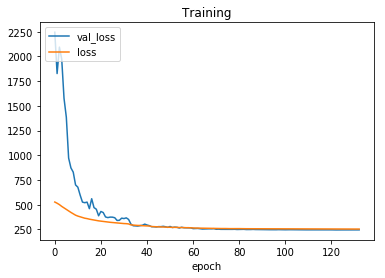

In [6]:
PlotHistory(model.history.history,listKeys=['val_loss','loss']) 

val_acc_pred   :  [0.9611101765649599, 0.961153454627855, 0.9611832198299123, 0.9611041917071224]
acc_pred   :  [0.959460889148276, 0.9595353668782769, 0.9595140538564543, 0.9594721085414654]


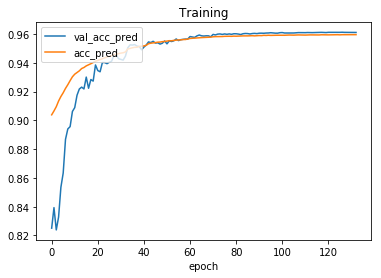

In [7]:
PlotHistory(model.history.history,listKeys=['val_acc_pred','acc_pred'])

lr   :  [1.953125e-06, 1.953125e-06, 1.953125e-06, 1.953125e-06]


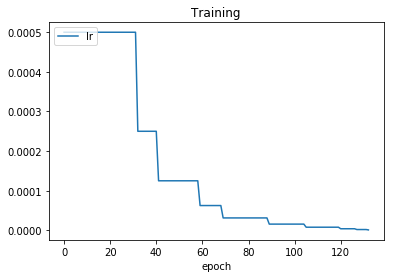

In [8]:
PlotHistory(model.history.history,listKeys=['lr'])

# Evaluate Model with Test dataset 

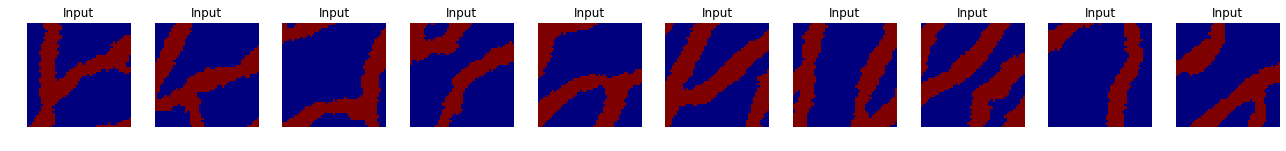

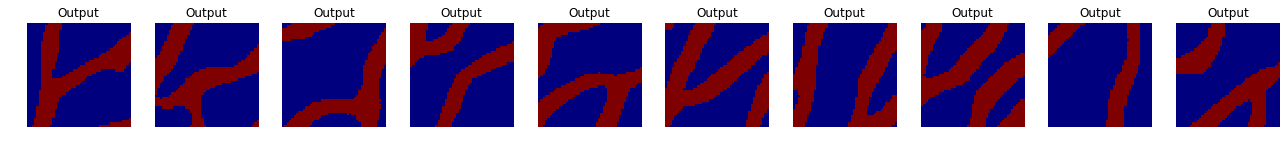

In [9]:
if load_tfrecords:
    x_test = gen_test.get_numpy_batch()

x_rec = model.model.predict(x_test)
PlotDataAE(x_test[:,:,:,1], np.argmax(x_rec[:,:,:,:],axis=-1),digit_size=(45,45))

# Generate random sampling

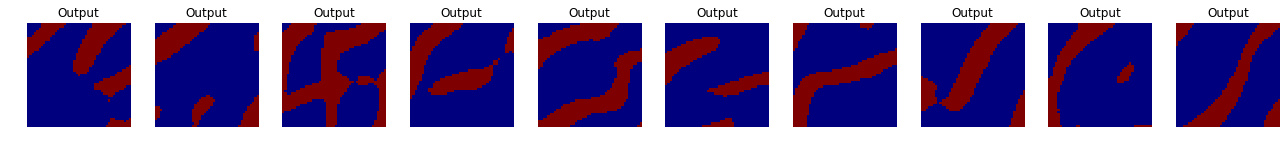

In [10]:
x_gen=model.generate(binary=True)
PlotDataAE([],x_gen[:,:,:],digit_size=(45,45),Only_Result=False)